In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

In [2]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.



In [4]:
x_train = x_train[..., tf.newaxis] #adds a additional axis (60000,28,28) --> (60000,28,28,1)
x_test = x_test[..., tf.newaxis]
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


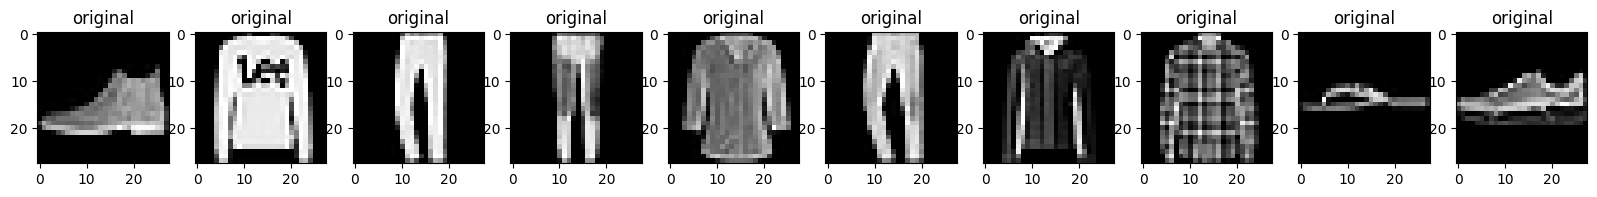

In [5]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.title("original")
    plt.imshow(tf.squeeze(x_test[i]))
    plt.gray()
plt.show()

In [6]:
class Vanilla_CNN(Model):
    def __init__(self):
        super(Vanilla_CNN, self).__init__()
        self.encoder = tf.keras.Sequential([
          layers.Input(shape=(28, 28, 1)),
          layers.Conv2D(16, (3, 3), activation='relu', padding='same', strides=2),
          layers.Conv2D(8, (3, 3), activation='relu', padding='same', strides=2)])

        self.decoder = tf.keras.Sequential([
          layers.Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'),
          layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
          layers.Conv2D(1, kernel_size=(3, 3), activation='sigmoid', padding='same')])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded


In [7]:
autoencoder = Vanilla_CNN()

In [8]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [9]:
autoencoder.fit(x_train, x_train,
                epochs=30,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 72s 37ms/step - loss: 0.0312 - val_loss: 0.0064
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 37ms/step - loss: 0.0058 - val_loss: 0.0043
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 67s 36ms/step - loss: 0.0040 - val_loss: 0.0035
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 86s 38ms/step - loss: 0.0034 - val_loss: 0.0032
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 72s 32ms/step - loss: 0.0032 - val_loss: 0.0031
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 33ms/step - loss: 0.0030 - val_loss: 0.0030
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 62s 33ms/step - loss: 0.0030 - val_loss: 0.0029
Epoch 8/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 66s 35ms/step - loss: 0.0029 - val_loss: 0.0028
Epoch 9/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 62s 33ms/step - loss: 0.0028 - val_loss: 0.0028
Epoch 10/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 95s 40ms/step - loss: 0.0027 - val_loss: 0.0027
Epoch 11/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 70s 34ms/step - loss: 0.0027 - val_loss: 0.0026
Epoch 12

In [10]:
autoencoder.encoder.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 14, 14, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 7, 7, 8)             │           1,160 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,320 (5.16 KB)

 Trainable params: 1,320 (5.16 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
autoencoder.decoder.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_transpose (Conv2DTranspose)   │ (32, 14, 14, 8)             │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_1 (Conv2DTranspose) │ (32, 28, 28, 16)            │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (32, 28, 28, 1)             │             145 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,897 (7.41 KB)

 Trainable params: 1,897 (7.41 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

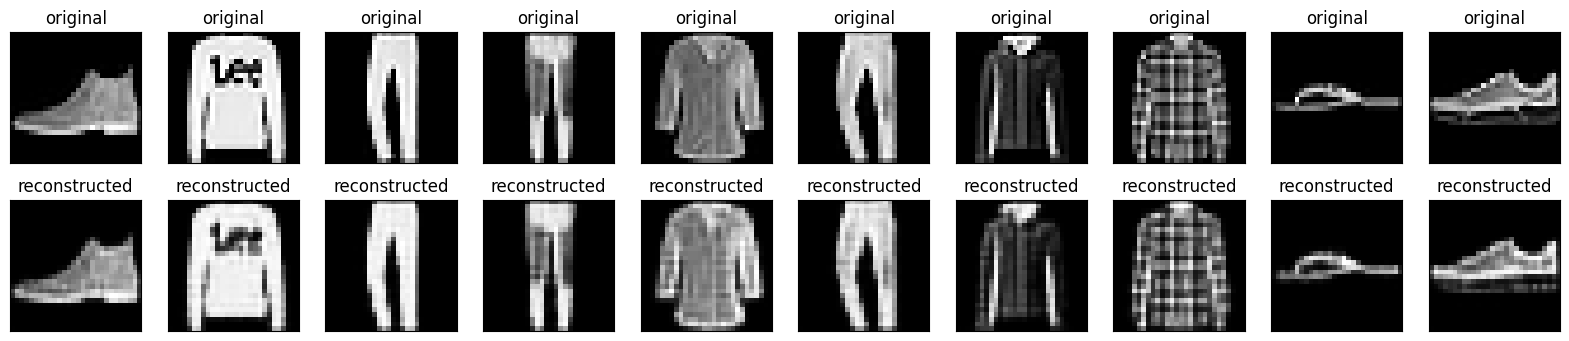

In [13]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.title("original")
    plt.imshow(tf.squeeze(x_test[i]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    bx = plt.subplot(2, n, i + n + 1)
    plt.title("reconstructed")
    plt.imshow(tf.squeeze(decoded_imgs[i]))
    plt.gray()
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)
plt.show()

In [16]:
from sklearn.metrics import mean_squared_error

# Predicting on the test data
reconstructed_images = autoencoder.predict(x_test) # Use autoencoder instead of model

# Calculating the MSE
mse = mean_squared_error(x_test.reshape(len(x_test), -1), reconstructed_images.reshape(len(x_test), -1))
print(f"Mean Squared Error for test dataset: {mse}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step
Mean Squared Error for test dataset: 0.16973435878753662


Convolutional layers keep the image's spatial structure, while dense layers do
not. This allows the model to capture important image features more effectively.

CNNs are great at identifying edges, textures, and complex patterns in images, improving the reconstruction quality.

This leads to lower errors for CNN-based autoencoders, especially with image data like Fashion MNIST.